In [22]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\stefa\OneDrive\Career Foundry\Chase Bank Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'database.pkl'))

In [4]:
df

Institution Name  Main Office                       Branch Name  \
0     JPMorgan Chase Bank            0  Avenue U and East 17th St Branch   
1     JPMorgan Chase Bank            0   Broadway and 96th Street Branch   
2     JPMorgan Chase Bank            0                    Ravenna Branch   
3     JPMorgan Chase Bank            0                Norman Main Branch   
4     JPMorgan Chase Bank            0    Downtown Main Milwaukee Branch   
...                   ...          ...                               ...   
5408  JPMorgan Chase Bank            0              Biddle Eureka Branch   
5409  JPMorgan Chase Bank            0        Crawfordsville Main Branch   
5410  JPMorgan Chase Bank            0               Kenosha Main Branch   
5411  JPMorgan Chase Bank            0                   Marietta Branch   
5412  JPMorgan Chase Bank            0                    Mulford Branch   

      Branch Number Established Date Acquired Date  \
0               501         1/1/1900     6/20/1992   
1               512         1/1/1900     6/20/1992   
2              1622         1/1/1900    11/13/2004   
3              3263         1/1/1900    11/13/2004   
4              2852         9/1/1901    11/13/2004   
...             ...              ...           ...   
5408           2716       11/20/1871    11/13/2004   
5409           2978       12/05/1864    11/13/2004   
5410           2888       12/06/1852    11/13/2004   
5411           1675       12/09/1889    11/13/2004   
5412           3157       12/14/1854    11/13/2004   

                   Street Address            City      County State  Zipcode  \
0                   1722 Avenue U        Brooklyn       Kings    NY    11229   
1      2551 Broadway, 96th Street   New York City    New York    NY    10025   
2            235 West Main Street         Ravenna     Portage    OH    44266   
3         116 South Peters Avenue          Norman   Cleveland    OK    73069   
4       111 East Wisconsin Avenue       Milwaukee   Milwaukee    WI    53202   
...                           ...             ...         ...   ...      ...   
5408           3200 Biddle Avenue       Wyandotte       Wayne    MI    48192   
5409  200 South Washington Street  Crawfordsville  Montgomery    IN    47933   
5410            5522 Sixth Avenue         Kenosha     Kenosha    WI    53140   
5411            125 Putnam Street        Marietta  Washington    OH    45750   
5412       6000 East State Street        Rockford   Winnebago    IL    61108   

      Latitude  Longitude  2010 Deposits  2011 Deposits  2012 Deposits  \
0     40.59911  -73.95374       257757.0       256109.0       269664.0   
1     40.79445  -73.97206       327054.0       336573.0       354604.0   
2     41.15767  -81.24459        48912.0        51191.0        55157.0   
3     35.22084  -97.44146        35731.0        35753.0        40803.0   
4     43.03863  -87.90934      2305660.0      3110446.0      3332864.0   
...        ...        ...            ...            ...            ...   
5408  42.20100  -83.15033        70274.0        69915.0        75746.0   
5409  40.04054  -86.90134       107146.0       114380.0       125170.0   
5410  42.58539  -87.81866       133476.0       161447.0       159164.0   
5411  39.41502  -81.45496        59830.0        69312.0        93685.0   
5412  42.26704  -88.99898       410368.0       348603.0       381521.0   

      2013 Deposits  2014 Deposits  2015 Deposits  2016 Deposits  
0          393884.0       410870.0       432799.0         480204  
1          385553.0       422699.0       441168.0         474228  
2           58053.0        63305.0        63642.0          66354  
3           42553.0        45875.0        48025.0          49546  
4         3541565.0      3420665.0      3986938.0        3626444  
...             ...            ...            ...            ...  
5408        76375.0        77532.0        79902.0          78981  
5409       120059.0       125911.0       123893.0         119

### Data Cleaning

In [5]:
df.shape

(3797, 20)

In [6]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Institution Name     0
Main Office          0
Branch Name          0
Branch Number        0
Established Date     0
Acquired Date        0
Street Address       0
City                 0
County               0
State                0
Zipcode              0
Latitude            13
Longitude           13
2010 Deposits        0
2011 Deposits        0
2012 Deposits        0
2013 Deposits        0
2014 Deposits        0
2015 Deposits        0
2016 Deposits        0
dtype: int64

In [8]:
df_clean = df[df['Latitude'].isnull() == False]

In [9]:
df_clean = df[df['Longitude'].isnull() == False]

In [12]:
df_clean.shape

#Cleaning rows with missing values.

(3784, 20)

In [14]:
# Check for missing values

df_clean.isnull().sum()

# No missing values to handle

Institution Name    0
Main Office         0
Branch Name         0
Branch Number       0
Established Date    0
Acquired Date       0
Street Address      0
City                0
County              0
State               0
Zipcode             0
Latitude            0
Longitude           0
2010 Deposits       0
2011 Deposits       0
2012 Deposits       0
2013 Deposits       0
2014 Deposits       0
2015 Deposits       0
2016 Deposits       0
dtype: int64

In [15]:
dups = df_clean.duplicated()

In [16]:
dups.shape # No dups

(3784,)

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2010 Deposits', ylabel='Density'>

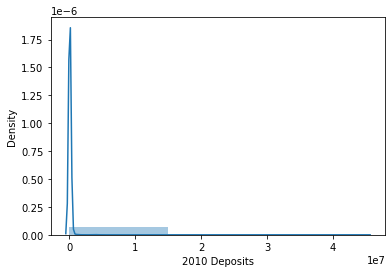

In [19]:
sns.distplot(df['2010 Deposits'], bins=3) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [21]:
df_clean.describe()

Main Office  Branch Number       Zipcode     Latitude    Longitude  \
count       3784.0    3784.000000   3784.000000  3784.000000  3784.000000   
mean           0.0    3614.043605  59682.069503    37.669354   -95.469941   
std            0.0    1705.324102  30235.858763     5.406472    17.479718   
min            0.0     174.000000   2110.000000     0.000000  -124.421370   
25%            0.0    2217.750000  40219.000000    33.460763  -116.435655   
50%            0.0    3347.500000  60714.000000    39.705055   -89.025590   
75%            0.0    5035.250000  90002.500000    41.338387   -81.637325   
max            0.0    6880.000000  99362.000000    48.801330     0.000000   

       2010 Deposits  2011 Deposits  2012 Deposits  2013 Deposits  \
count   3.784000e+03   3.784000e+03   3.784000e+03   3.784000e+03   
mean    1.048235e+05   1.195735e+05   1.346087e+05   1.484102e+05   
std     9.417344e+05   1.286740e+06   1.608177e+06   1.768818e+06   
min     0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
25%     2.856425e+04   3.046625e+04   3.369350e+04   3.655400e+04   
50%     4.952450e+04   5.181600e+04   5.769000e+04   6.230400e+04   
75%     9.067975e+04   9.479075e+04   1.024552e+05   1.104012e+05   
max     4.509908e+07   6.263098e+07   8.196038e+07   8.517781e+07   

       2014 Deposits  2015 Deposits  2016 Deposits  
count   3.784000e+03   3.784000e+03   3.784000e+03  
mean    1.700647e+05   1.698331e+05   1.742072e+05  
std     2.247752e+06   1.874262e+06   1.631613e+06  
min     0.000000e+00   0.000000e+00   0.000000e+00  
25%     3.971175e+04   4.366625e+04   4.805425e+04  
50%     6.799750e+04   7.366150e+04   8.124450e+04  
75%     1.187362e+05   1.274132e+05   1.408295e+05  
max     9.832216e+07   8.456904e+07   6.904479e+07

### Data prep for regression analysis 

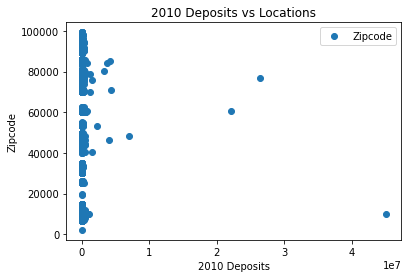

In [26]:
# Creating a scatterplot to test variable relationships

df.plot(x = '2010 Deposits', y='Zipcode',style='o')
plt.title('2010 Deposits vs Locations')  
plt.xlabel('2010 Deposits')  
plt.ylabel('Zipcode')  
plt.show()

### Hypothesis

In [27]:
#Hypothesis: Banks will have a growth where there is a growing population density.

### Reshaping variables

In [28]:
X = df['2010 Deposits'].values.reshape(-1,1)
y = df['Zipcode'].values.reshape(-1,1)

In [30]:
X

array([[257757.],
       [327054.],
       [ 48912.],
       ...,
       [133476.],
       [ 59830.],
       [410368.]])

In [31]:
y

array([[11229],
       [10025],
       [44266],
       ...,
       [53140],
       [45750],
       [61108]], dtype=int64)

### Splitting the data into training and test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predicted = regression.predict(X_test)

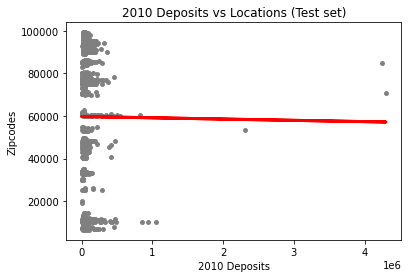

In [36]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('2010 Deposits vs Locations (Test set)')
plot_test.xlabel('2010 Deposits')
plot_test.ylabel('Zipcodes')
plot_test.show()

Unfortunately the regression line seems to show a negative trend almost at zero, so there is not much correlation between the 2.

### Model Performance Statistics

In [37]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00060014]]
Mean squared error:  933422513.7853724
R2 score:  -0.00015589600079768395


### Comparing predicted and actual y-values

In [39]:
y_predicted

array([[59748.18103385],
       [59693.18980486],
       [59678.12978194],
       ...,
       [59751.21776439],
       [59727.64529366],
       [59753.82359126]])

In [40]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0    40203  59748.181034
1    11934  59693.189805
2    11223  59678.129782
3    93923  59716.933917
4    95425  59741.910125
5    98027  59713.076189
6    91606  59700.147279
7    95616  59698.615110
8    90262  59745.430572
9    10528  59671.941693
10   80525  59717.332413
11   97355  59738.497104
12   53714  59742.239605
13   45373  59740.269931
14   91402  59677.255972
15   92130  59744.447536
16   75225  59585.690144
17   40258  59739.562961
18   60614  59615.723169
19   91423  59722.838137
20   98042  59732.876152
21   46229  59710.392343
22   11374  59730.689826
23   90017  59540.133185
24   84117  59721.002896
25   85015  59725.356943
26   71301  59741.592049
27   43074  59743.896003
28   95120  59743.808382
29   40241  59733.910801

According to our R2 score we can see that there is indeed very little correlation. We must continue to investigate other correlations.